## 1. Data Cleaning and Preprocessing

In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('29_data/09_USvideos.csv',encoding = "ISO-8859-1")

In [6]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ??? \n\nSUBSCRIBE ??? ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False,I know it's been a while since we did this sho...


In [123]:
data = data[['category_id', 'title', 'tags', 'description']]

In [124]:
data.head()

,category_id,title,tags,description
0,22,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,24,The Trump Presidency: Last Week Tonight with J...,"last week tonight trump presidency|""last week ...","One year after the presidential election, John..."
2,23,"Racist Superman | Rudy Mancuso, King Bach & Le...","racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,24,Nickelback Lyrics: Real or Fake?,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...
4,24,I Dare You: GOING BALD!?,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...


In [125]:
data_J = pd.read_json('/Users/chenshunchao/Downloads/youtube-new/US_category_id.json')

In [126]:
data_J['items'][0]['snippet']['title']

'Film & Animation'

In [127]:
data_J['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [128]:
# replaced all the ID numbers by their corresponding categories

ids=[]
for index, row in data.iterrows():
    search_id=row['category_id']
    
    for i in range (len(data_J)):
        if str(search_id)==data_J['items'][i]['id']:
            ids.append(data_J['items'][i]['snippet']['title'])
        
data['new_id']=ids

In [129]:
print(data.shape)
data.head()

(40949, 5)


,category_id,title,tags,description,new_id
0,22,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,24,The Trump Presidency: Last Week Tonight with J...,"last week tonight trump presidency|""last week ...","One year after the presidential election, John...",Entertainment
2,23,"Racist Superman | Rudy Mancuso, King Bach & Le...","racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,24,Nickelback Lyrics: Real or Fake?,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...,Entertainment
4,24,I Dare You: GOING BALD!?,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...,Entertainment


In [130]:
data_set = data.drop(columns = ['category_id'])

In [131]:
data_set.head()

,title,tags,description,new_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,"last week tonight trump presidency|""last week ...","One year after the presidential election, John...",Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...","racist superman|""rudy""|""mancuso""|""king""|""bach""...",WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,Nickelback Lyrics: Real or Fake?,"rhett and link|""gmm""|""good mythical morning""|""...",Today we find out if Link is a Nickelback amat...,Entertainment
4,I Dare You: GOING BALD!?,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",I know it's been a while since we did this sho...,Entertainment


In [135]:
# clean tags data

import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus1 = []
for i in range(0, len(data_set)):
    tag = re.sub('[^a-zA-Z]', ' ', data_set['tags'][i])
    tag = tag.lower().split()
    ps = PorterStemmer()
    tag = [ps.stem(word) for word in tag if not word in set(stopwords.words ('english'))]
    tag = ' '.join(tag)
    corpus1.append(tag)


In [140]:
data_set['tags'] = corpus1

In [141]:
data_set.head()

,title,tags,description,new_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,shantel martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presid last week tonig...,"One year after the presidential election, John...",Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman rudi mancuso king bach racist ...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,Nickelback Lyrics: Real or Fake?,rhett link gmm good mythic morn rhett link goo...,Today we find out if Link is a Nickelback amat...,Entertainment
4,I Dare You: GOING BALD!?,ryan higa higatv nigahiga dare idi rhpc dare t...,I know it's been a while since we did this sho...,Entertainment


In [152]:
# clean title data

import time
start_time = time.time()
corpus2 = []
for i in range(0, len(data_set)):
    tit = re.sub('[^a-zA-Z]', ' ', data_set['title'][i])
    tit = tit.lower().split()
    ps = PorterStemmer()
    tit = [ps.stem(word) for word in tit if not word in set(stopwords.words ('english'))]
    tit = ' '.join(tit)
    corpus2.append(tit)
print("-- %s seconds --" % (time.time() - start_time))

-- 64.60618090629578 seconds --


In [154]:
data_set['title'] = corpus2

In [163]:
data_set.head()

,title,tags,description,new_id
0,want talk marriag,shantel martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,trump presid last week tonight john oliv hbo,last week tonight trump presid last week tonig...,"One year after the presidential election, John...",Entertainment
2,racist superman rudi mancuso king bach lele pon,racist superman rudi mancuso king bach racist ...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,nickelback lyric real fake,rhett link gmm good mythic morn rhett link goo...,Today we find out if Link is a Nickelback amat...,Entertainment
4,dare go bald,ryan higa higatv nigahiga dare idi rhpc dare t...,I know it's been a while since we did this sho...,Entertainment


In [1]:
# clean description data, it is really time consuming 
import time 
start_time = time.time()
corpus3 = []
for i in range(0, len(data_set)):
    des = re.sub('[^a-zA-Z]', ' ', str(data_set['description'][i]))
    des = des.lower().split()
    ps = PorterStemmer()
    des = [ps.stem(word) for word in des if not word in set(stopwords.words ('english'))]
    des = ' '.join(des)
    corpus3.append(des)
print("-- %s seconds --" % (time.time() - start_time))

In [170]:
data_set['description'] = corpus3

In [171]:
data_set.head()

,title,tags,description,new_id
0,want talk marriag,shantel martin,shantel channel http www youtub com shantellma...,People & Blogs
1,trump presid last week tonight john oliv hbo,last week tonight trump presid last week tonig...,one year presidenti elect john oliv discuss le...,Entertainment
2,racist superman rudi mancuso king bach lele pon,racist superman rudi mancuso king bach racist ...,watch previou video n nsubscrib http www youtu...,Comedy
3,nickelback lyric real fake,rhett link gmm good mythic morn rhett link goo...,today find link nickelback amateur secret nick...,Entertainment
4,dare go bald,ryan higa higatv nigahiga dare idi rhpc dare t...,know sinc show back might best episod yet nlea...,Entertainment


In [9]:
# Output the after-cleaned data to csv
data_set.to_csv(r'/Users/chenshunchao/Downloads/youtube-new/US_cleaned.csv', index = False)

In [173]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 4 columns):
title          40949 non-null object
tags           40949 non-null object
description    40949 non-null object
new_id         40949 non-null object
dtypes: object(4)
memory usage: 1.2+ MB


In [174]:
data_set.isnull().sum()

title          0
tags           0
description    0
new_id         0
dtype: int64

In [179]:
data_set.shape

(40949, 4)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_set = pd.read_csv('29_data/12_US_cleaned.csv', index_col = 0)

In [6]:
# add views to the csv for checking the category trends 
data_set['Views'] = data['views']

In [7]:
data_set.head()

,title,tags,description,new_id,Views
Unnamed: 0,,,,,
0,want talk marriag,shantel martin,shantel channel http www youtub com shantellma...,People & Blogs,748374
1,trump presid last week tonight john oliv hbo,last week tonight trump presid last week tonig...,one year presidenti elect john oliv discuss le...,Entertainment,2418783
2,racist superman rudi mancuso king bach lele pon,racist superman rudi mancuso king bach racist ...,watch previou video n nsubscrib http www youtu...,Comedy,3191434
3,nickelback lyric real fake,rhett link gmm good mythic morn rhett link goo...,today find link nickelback amateur secret nick...,Entertainment,343168
4,dare go bald,ryan higa higatv nigahiga dare idi rhpc dare t...,know sinc show back might best episod yet nlea...,Entertainment,2095731


In [8]:
hist_d = data_set.groupby(['new_id'])['Views'].sum()

In [9]:
hist_d1 = hist_d.to_frame()

In [10]:
hist_d2 = hist_d1.sort_values(by=['Views'])

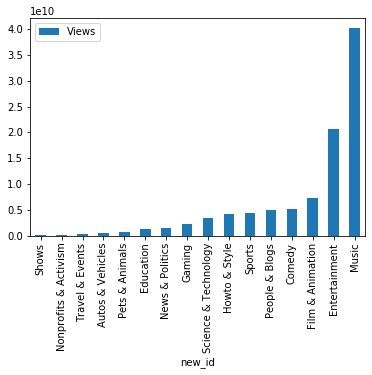

In [11]:
hist_d2.plot.bar()

In [12]:
# hist_d2 = hist_d1.reset_index()

In [13]:
# Turn the id back to number for further classification 
# data_set['new_id'] = data['category_id']

In [14]:
data_set.head()

,title,tags,description,new_id,Views
Unnamed: 0,,,,,
0,want talk marriag,shantel martin,shantel channel http www youtub com shantellma...,People & Blogs,748374
1,trump presid last week tonight john oliv hbo,last week tonight trump presid last week tonig...,one year presidenti elect john oliv discuss le...,Entertainment,2418783
2,racist superman rudi mancuso king bach lele pon,racist superman rudi mancuso king bach racist ...,watch previou video n nsubscrib http www youtu...,Comedy,3191434
3,nickelback lyric real fake,rhett link gmm good mythic morn rhett link goo...,today find link nickelback amateur secret nick...,Entertainment,343168
4,dare go bald,ryan higa higatv nigahiga dare idi rhpc dare t...,know sinc show back might best episod yet nlea...,Entertainment,2095731


In [15]:
# combine mutiple columns together to make a corpus
data_set['Combined_Corpus'] = data_set['title'] + data_set ['tags'] + data_set ['description']

In [16]:
# check if it works
data_x = data_set['Combined_Corpus'].values.ravel()
data_x[0:3]

array(['want talk marriagshantel martinshantel channel http www youtub com shantellmartin ncandic http www lovebilli com n nfilm video k http amzn stdnrz nwith len http amzn rujomd nbig drone http tinyurl com h ft oy nother gear http amzn glx nsoni camera http amzn nobmnv nold camera http amzn cqbt nmain len http amzn od gbj nbig soni camera http amzn nrdjro nbig canon camera http tinyurl com jn q vz nbendi tripod thing http tinyurl com gw ylz nyou need bendi tripod http tinyurl com j mzzua nwide len http tinyurl com jkfcm nmore expens wide len http tinyurl com zrdgtou nsmall camera http tinyurl com hrrzhor nmicrophon http tinyurl com zefm jy nother microphon http tinyurl com jxgpj nold drone cheaper still great http tinyurl com zcfmnmd n nfollow http instagram com caseyneistat non http www facebook com cneistat non http twitter com caseyneistat n namaz intro song http soundcloud com discoteeth n nad disclosur ad sell promot anyth samsung produc shantel video galaxi project initi enabl

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize the TfidfVectorizer 
tfidf_vect = TfidfVectorizer() 
# generate tfidf matrix
#Notice: 1. convert numpy.ndarray to 1-dimension, flatten() doesn't work; 2. encode it into binary
dtm= tfidf_vect.fit_transform(data_set['Combined_Corpus'].values.ravel().astype('U'))
print("type of dtm:", type(dtm))
print("size of tfidf matrix:", dtm.shape)

type of dtm: <class 'scipy.sparse.csr.csr_matrix'>
size of tfidf matrix: (40949, 68116)


In [17]:
# the number of words in the vocabulary
print("total number of words:", len(tfidf_vect.vocabulary_))

print("type of vocabulary:", \
      type(tfidf_vect.vocabulary_))
print("index of word 'call' in vocabulary:", \
      tfidf_vect.vocabulary_['call'])


total number of words: 68116
type of vocabulary: <class 'dict'>
index of word 'call' in vocabulary: 7451


In [19]:
import pickle
pickle.dump(tfidf_vect.vocabulary_,open("29_data/28_USvideo_TFIDF","wb"))


## Model 1: Naive Bayes

In [20]:
# use MultinomialNB algorithm
from sklearn.naive_bayes import MultinomialNB
# import method for split train/test data set
from sklearn.model_selection import train_test_split
# import method to calculate metrics, support?
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
# split dataset into train (70%) and test sets (30%)
X_train, X_test, y_train, y_test = train_test_split(dtm, data_set["new_id"], test_size=0.3, random_state=0)

In [21]:
X_train.shape


(28664, 68116)

In [22]:
y_train.shape

(28664,)

In [23]:
import time
start_time = time.time()

# train a multinomial naive Bayes model using the testing data
# clf = MultinomialNB().fit(X_sm, y_sm)
clf = MultinomialNB().fit(X_train, y_train)
# predict the news group for the test dataset
predicted=clf.predict(X_test)

print("-- %s seconds --" % (time.time() - start_time))
# check a few samples
predicted[0:3]
#type(predicted)
#y_test[0:3]
#type(y_test)

-- 0.21741724014282227 seconds --


array(['Film & Animation', 'Music', 'Comedy'], dtype='<U21')

In [24]:
#make confusion matrix
from sklearn.metrics import confusion_matrix
cm_array=confusion_matrix(y_test,predicted)

In [25]:
"""
import seaborn as sn
df_cm = pd.DataFrame(cm_array, range(16),range(16))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

plt.show()
"""

'\nimport seaborn as sn\ndf_cm = pd.DataFrame(cm_array, range(16),range(16))\n#plt.figure(figsize = (10,7))\nsn.set(font_scale=1.4)#for label size\nsn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size\n\nplt.show()\n'

In [26]:
cm_labels=sorted(data_set["new_id"].unique())
cm_labels

['Autos & Vehicles',
 'Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'Howto & Style',
 'Music',
 'News & Politics',
 'Nonprofits & Activism',
 'People & Blogs',
 'Pets & Animals',
 'Science & Technology',
 'Shows',
 'Sports',
 'Travel & Events']

In [27]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

__main__
_test_cm: test function with confusion matrix done
and pause
_test_data_class: test function with y_test (actual values) and predictions (predic)


d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:155: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:156: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:158: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: In future, it will 

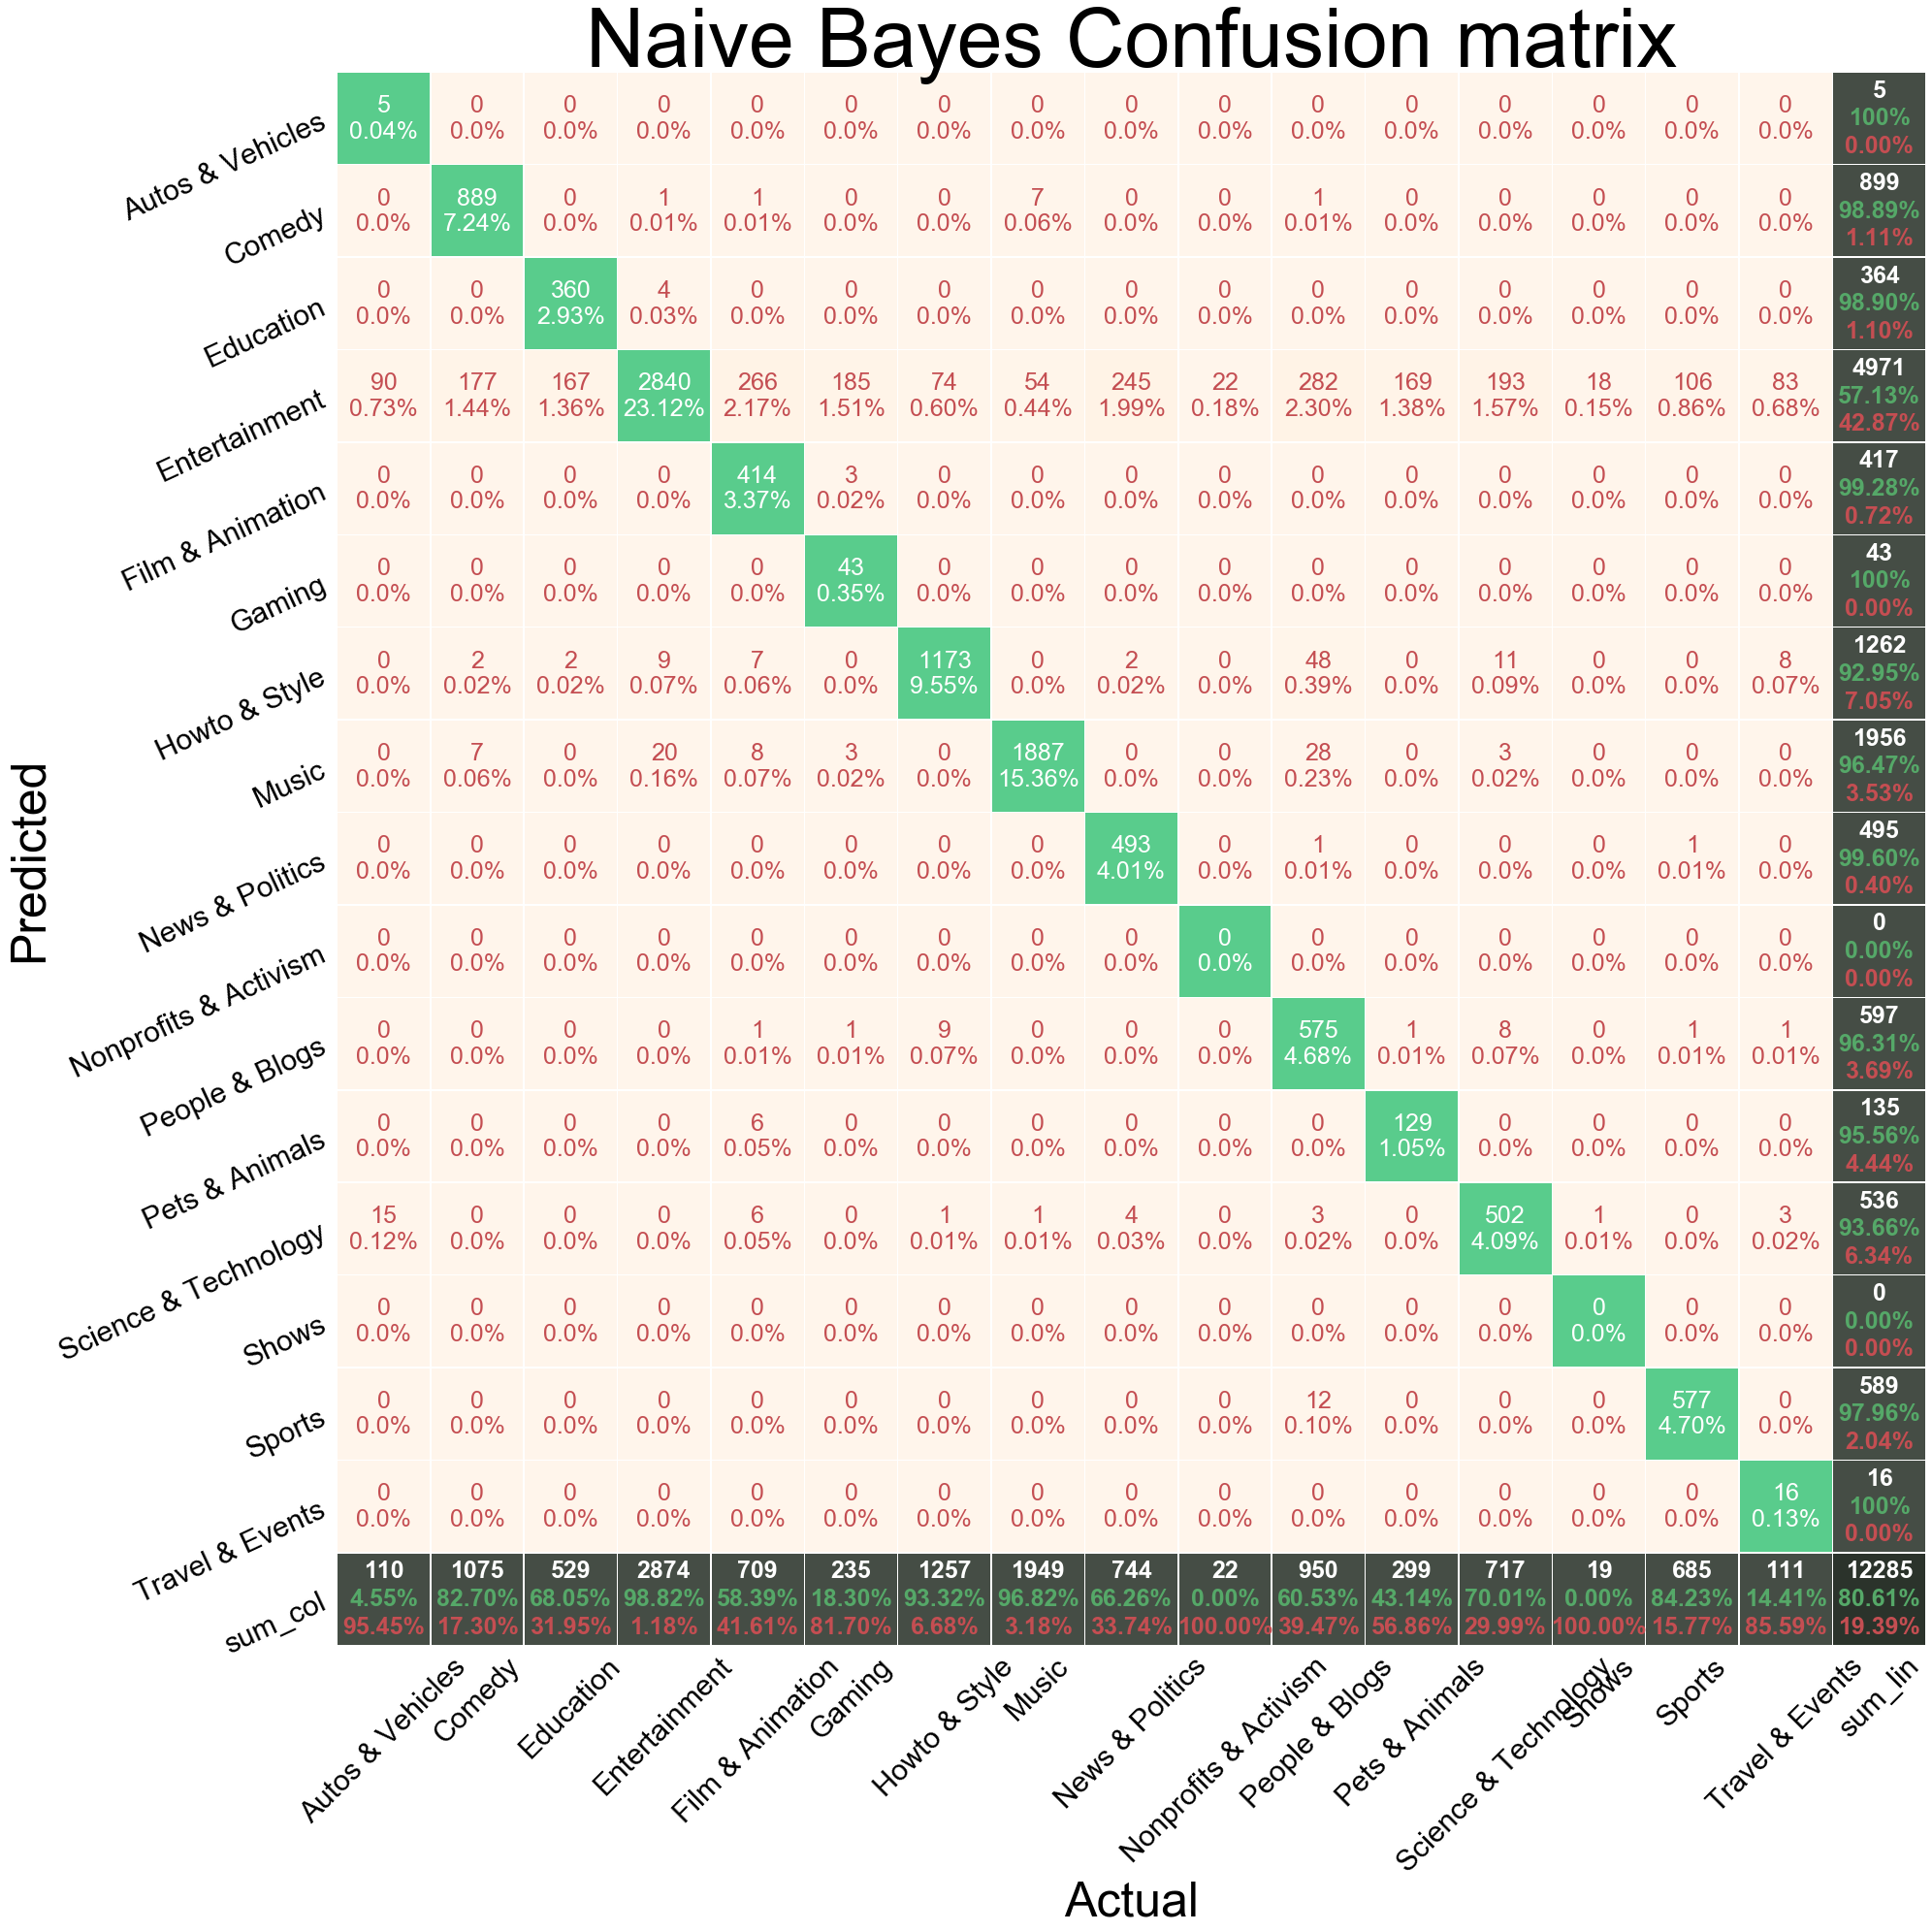

In [29]:
#https://github.com/wcipriano/pretty-print-confusion-matrix/blob/master/confusion_matrix_pretty_print.py
#This model is used for good heat map plot
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=12,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    sn.set(font_scale=7) #this line can change title"Confusion Matrix" size
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)
    ax.figure.axes[-1].yaxis.label.set_size(50) #this line can adjust x-asix "Actual" size
    ax.figure.axes[-1].xaxis.label.set_size(50) #this line can adjust x-asix "Actual" size

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 30)    #here fontsize can change font cell size
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 30)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Naive Bayes Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=1, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 25;   #adjust front size in cell
    figsize=[30,30];
    show_null_values = 2
    df_cm = DataFrame(confm, index=cm_labels, columns=cm_labels)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#



#
#TEST functions
#
def _test_cm():
    #test function with confusion matrix done
    array = np.array( [[13,  0,  1,  0,  2,  0],
                       [ 0, 50,  2,  0, 10,  0],
                       [ 0, 13, 16,  0,  0,  3],
                       [ 0,  0,  0, 13,  1,  0],
                       [ 0, 40,  0,  1, 15,  0],
                       [ 0,  0,  0,  0,  0, 20]])
    #get pandas dataframe
    df_cm = DataFrame(cm_array, index=range(1,17), columns=range(1,17))
    #colormap: see this and choose your more dear
    cmap = 'PuRd'
    pretty_plot_confusion_matrix(df_cm, cmap=cmap)
#

def _test_data_class():
    """ test function with y_test (actual values) and predictions (predic) """
    #data
#    y_test = np.array([1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
#    predic = np.array([1,2,4,3,5, 1,2,4,3,5, 1,2,3,4,4, 1,4,3,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,3,3,5, 1,2,3,3,5, 1,2,3,4,4, 1,2,3,4,1, 1,2,3,4,1, 1,2,3,4,1, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
    """
      Examples to validate output (confusion matrix plot)
        actual: 5 and prediction 1   >>  3
        actual: 2 and prediction 4   >>  1
        actual: 3 and prediction 4   >>  10
    """
    columns = []
    annot = True;
    cmap = 'Oranges';
    fmt = '.2f'
    lw = 0.5
    cbar = False
    show_null_values = 2
    pred_val_axis = 'y'
    #size::
    fz = 27;
    figsize = [35,35];
    if(len(y_test) > 10):
        fz=20; figsize=[14,14];
    plot_confusion_matrix_from_data(y_test, predicted, columns,
      annot, cmap, fmt, fz, lw, cbar, figsize, show_null_values, pred_val_axis)
#


#
#MAIN function
#
if(__name__ == '__main__'):
    print('__main__')
    print('_test_cm: test function with confusion matrix done\nand pause')
#    _test_cm()
    plt.pause(5)
    print('_test_data_class: test function with y_test (actual values) and predictions (predic)')
    _test_data_class()

In [30]:
# Performance evaluation: 
# precision, recall, f1-score

# get the list of unique labels
labels=sorted(data_set["new_id"].unique())

# calculate performance metrics. 
# Support is the number of occurrences of each label

precision, recall, fscore, support=precision_recall_fscore_support(y_test, predicted, labels=labels)

print("labels: ", labels)
print("precision: ", precision)
print("recall: ", recall)
print("f-score: ", fscore)
print("support: ", support)

# get all performance metrics,y_test is ground truth 
print(classification_report (y_test, predicted, target_names=labels))

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


labels:  ['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment', 'Film & Animation', 'Gaming', 'Howto & Style', 'Music', 'News & Politics', 'Nonprofits & Activism', 'People & Blogs', 'Pets & Animals', 'Science & Technology', 'Shows', 'Sports', 'Travel & Events']
precision:  [1.         0.98887653 0.98901099 0.57131362 0.99280576 1.
 0.92947702 0.96472393 0.9959596  0.         0.96314908 0.95555556
 0.93656716 0.         0.97962649 1.        ]
recall:  [0.04545455 0.82697674 0.6805293  0.9881698  0.58392102 0.18297872
 0.93317422 0.96818881 0.66263441 0.         0.60526316 0.43143813
 0.70013947 0.         0.84233577 0.14414414]
f-score:  [0.08695652 0.90070922 0.806271   0.72402804 0.73534636 0.30935252
 0.93132195 0.96645327 0.79580307 0.         0.74337427 0.59447005
 0.80127694 0.         0.90580848 0.2519685 ]
support:  [ 110 1075  529 2874  709  235 1257 1949  744   22  950  299  717   19
  685  111]
                       precision    recall  f1-score   support

     Autos &

In [31]:
# check how imbalance the data is

data_set["new_id"].value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: new_id, dtype: int64

In [32]:
data_set["new_id"].unique()

array(['People & Blogs', 'Entertainment', 'Comedy',
       'Science & Technology', 'Film & Animation', 'News & Politics',
       'Sports', 'Music', 'Pets & Animals', 'Education', 'Howto & Style',
       'Autos & Vehicles', 'Travel & Events', 'Gaming',
       'Nonprofits & Activism', 'Shows'], dtype=object)

## Model 2 ANN 

In [33]:
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
# For reproducibility
np.random.seed(666)

Using TensorFlow backend.


In [34]:
# tackle imbalance by using SMOTE (Synthetic Minority Over-sampling Technique)
# The outcome is unfourtunely not good
#!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(X_train, y_train)
print(X_sm.shape, y_sm.shape)

(35719, 68116) (35719,)


In [35]:
# set up interactive shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [36]:

# 16 different categories
num_labels = 16
vocab_size = 68116
batch_size = 100
num_epochs = 30



#build a basic model
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               34875904  
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                8208      
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
Total params: 34,884,112
Trainable params: 34,884,112
Non-trainable params: 0
_________________________________________________________________


In [37]:
# encode label to one-hot 
from sklearn.utils import class_weight
from keras.utils import np_utils

encoder = LabelBinarizer()
encoder.fit(y_train)
y_train_code = encoder.transform(y_train)
y_test_code = encoder.transform(y_test)


y_train_labels = np.argmax(y_train_code, axis =1)
y_train_labels

y_test_labels = np.argmax(y_test_code, axis =1)
y_test_labels

one_hot_labels = np_utils.to_categorical(y_train_labels, num_classes=None)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

array([3, 3, 7, ..., 7, 7, 7], dtype=int64)

array([4, 7, 1, ..., 8, 7, 7], dtype=int64)

In [38]:

num_epochs =2
batch_size = 128
history = model.fit(X_train, one_hot_labels,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    validation_split=0.2)


Train on 22931 samples, validate on 5733 samples
Epoch 1/2
 - 156s - loss: 0.9562 - accuracy: 0.7782 - val_loss: 0.2069 - val_accuracy: 0.9587
Epoch 2/2
 - 146s - loss: 0.1047 - accuracy: 0.9788 - val_loss: 0.1015 - val_accuracy: 0.9761


In [39]:
one_hot_labels_test = np_utils.to_categorical(y_test_code, num_classes=None)

In [40]:

score, acc = model.evaluate(X_test, y_test_code,
                       batch_size=batch_size, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.9748473763465881


In [41]:
from sklearn import metrics

# evaluate the model using samples
scores = model.evaluate(X_test, y_test_code)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# get prediction
predicted=model.predict(X_test)
print(predicted[0:5])


12285/12285 [==============================] - 15s 1ms/step

accuracy: 97.48%
[[3.7088848e-04 1.9574827e-03 2.9891587e-04 2.8400109e-03 9.8818702e-01
  5.1601010e-04 2.5066914e-04 2.8831034e-03 2.2030146e-04 9.2895156e-05
  9.4020070e-04 3.6881908e-04 4.2331193e-04 7.9680074e-05 2.8820106e-04
  2.8262485e-04]
 [2.7886799e-05 2.2877370e-04 4.6859888e-05 2.5271819e-04 1.4553824e-04
  1.7757737e-05 1.0192030e-04 9.9894768e-01 3.4343277e-05 6.2461381e-06
  9.9474186e-05 2.1454469e-05 2.2270155e-05 6.1739393e-06 1.6874290e-05
  2.4164483e-05]
 [5.5383939e-06 9.9980408e-01 7.3442925e-06 1.1045364e-04 1.0785203e-05
  4.0113659e-06 1.0404841e-05 8.7791932e-06 1.9007408e-06 7.7209575e-07
  2.1143002e-05 4.3946043e-06 6.4148480e-06 8.4963756e-07 1.9145089e-06
  1.2880314e-06]
 [1.9990390e-03 1.9450460e-03 2.6323486e-03 7.1539301e-03 1.2126102e-03
  1.5041155e-03 7.6448801e-04 2.4127057e-03 5.0599491e-03 4.4053851e-04
  3.5079494e-03 1.1384191e-03 1.8633768e-03 4.6189397e-04 9.6681231e-01
  1.091

In [42]:
predicted

array([[3.7088848e-04, 1.9574827e-03, 2.9891587e-04, ..., 7.9680074e-05,
        2.8820106e-04, 2.8262485e-04],
       [2.7886799e-05, 2.2877370e-04, 4.6859888e-05, ..., 6.1739393e-06,
        1.6874290e-05, 2.4164483e-05],
       [5.5383939e-06, 9.9980408e-01, 7.3442925e-06, ..., 8.4963756e-07,
        1.9145089e-06, 1.2880314e-06],
       ...,
       [4.3407572e-03, 2.1896551e-03, 2.0456959e-03, ..., 5.0775311e-04,
        9.9913087e-03, 3.7290577e-03],
       [3.3946277e-04, 6.0781604e-04, 2.5545844e-04, ..., 8.0237653e-05,
        2.5368057e-04, 2.3605884e-04],
       [5.4846954e-04, 6.3389505e-04, 1.2489747e-04, ..., 3.9933759e-05,
        1.7559865e-04, 1.8249395e-04]], dtype=float32)

In [43]:
y_predicted_argmax=np.argmax(predicted,axis=1)

In [50]:
y_predicted_argmax

array([4, 7, 1, ..., 8, 7, 7], dtype=int64)

In [52]:
y_test_labels

array([4, 7, 1, ..., 8, 7, 7], dtype=int64)

*******************************************************************

In [54]:
cm_ANN=confusion_matrix(y_test_labels, y_predicted_argmax)

__main__
_test_cm: test function with confusion matrix done
and pause
_test_data_class: test function with y_test (actual values) and predictions (predic)


d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:155: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:156: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:158: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:159: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: In future, it will 

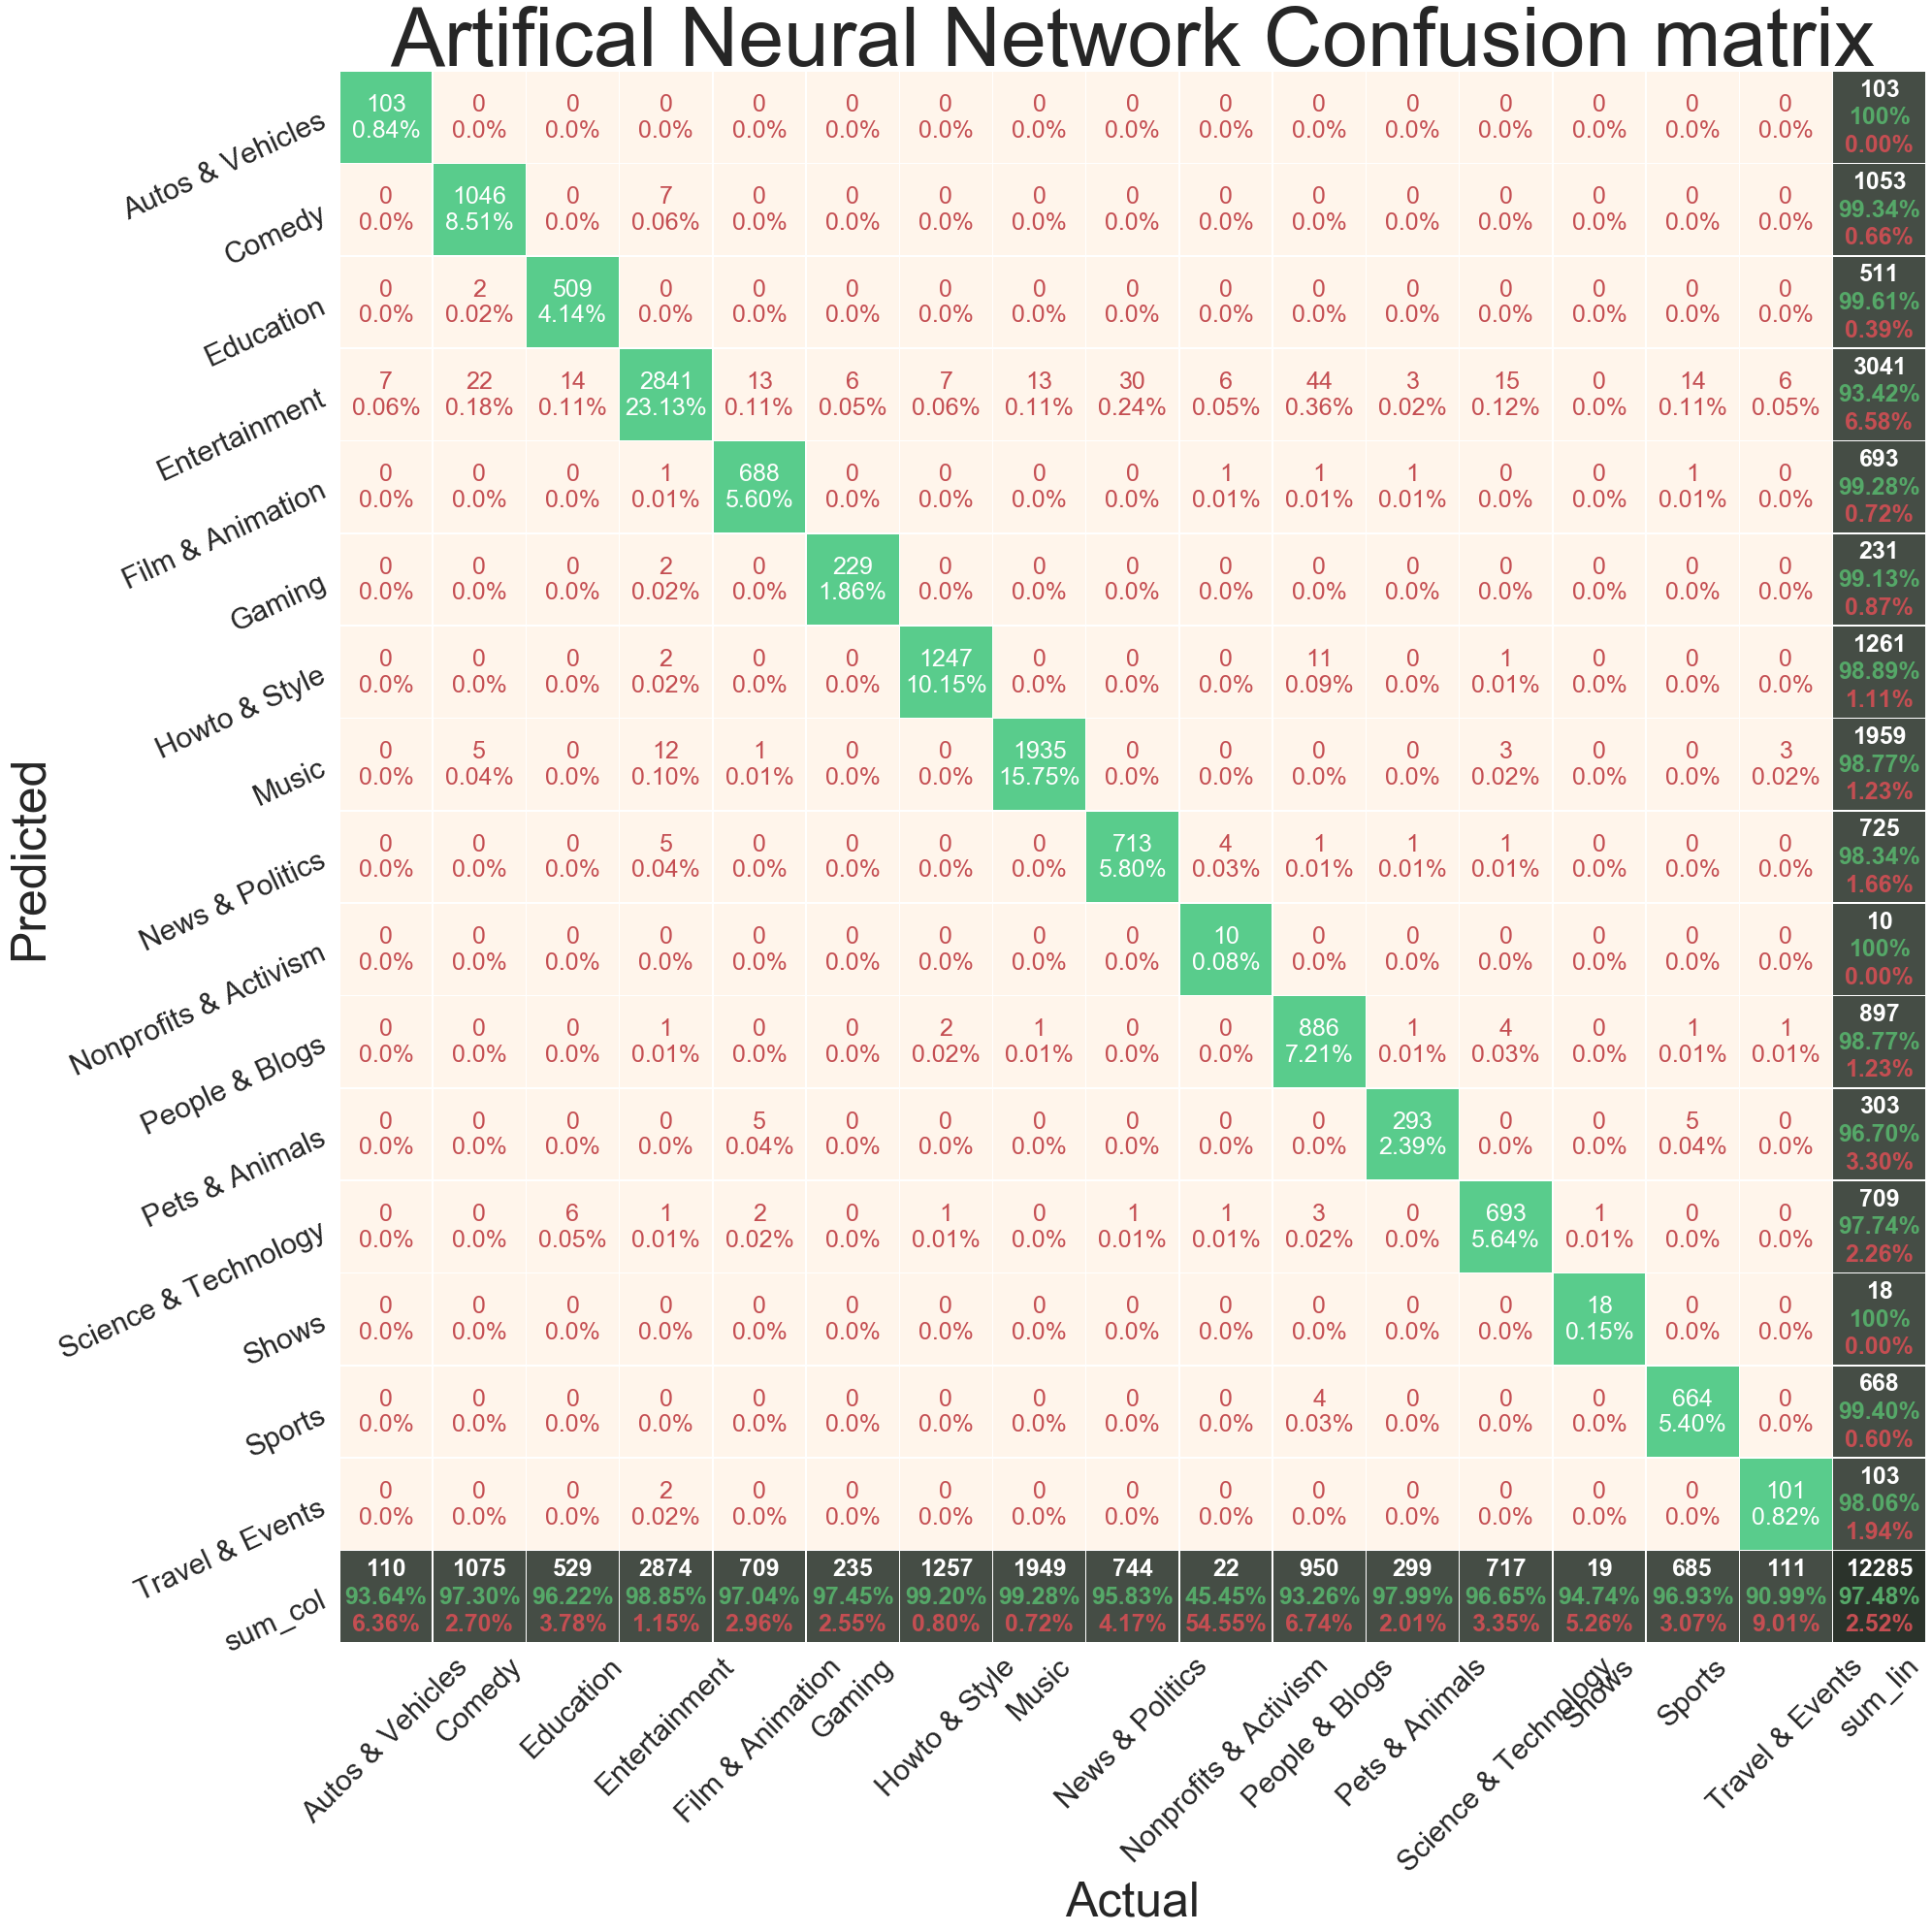

In [57]:
#https://github.com/wcipriano/pretty-print-confusion-matrix/blob/master/confusion_matrix_pretty_print.py
#This model is used for good heat map plot
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=12,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    sn.set(font_scale=7) #this line can change title"Confusion Matrix" size
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)
    ax.figure.axes[-1].yaxis.label.set_size(50) #this line can adjust x-asix "Actual" size
    ax.figure.axes[-1].xaxis.label.set_size(50) #this line can adjust x-asix "Actual" size

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 30)    #here fontsize can change font cell size
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 30)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Artifical Neural Network Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=1, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 25;   #adjust front size in cell
    figsize=[30,30];
    show_null_values = 2
    df_cm = DataFrame(confm, index=cm_labels, columns=cm_labels)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#



#
#TEST functions
#
def _test_cm():
    #test function with confusion matrix done
    array = np.array( [[13,  0,  1,  0,  2,  0],
                       [ 0, 50,  2,  0, 10,  0],
                       [ 0, 13, 16,  0,  0,  3],
                       [ 0,  0,  0, 13,  1,  0],
                       [ 0, 40,  0,  1, 15,  0],
                       [ 0,  0,  0,  0,  0, 20]])
    #get pandas dataframe
    df_cm = DataFrame(cm_array, index=range(1,17), columns=range(1,17))
    #colormap: see this and choose your more dear
    cmap = 'PuRd'
    pretty_plot_confusion_matrix(df_cm, cmap=cmap)
#

def _test_data_class():
    """ test function with y_test (actual values) and predictions (predic) """
    #data
#    y_test = np.array([1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
#    predic = np.array([1,2,4,3,5, 1,2,4,3,5, 1,2,3,4,4, 1,4,3,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,3,3,5, 1,2,3,3,5, 1,2,3,4,4, 1,2,3,4,1, 1,2,3,4,1, 1,2,3,4,1, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
    """
      Examples to validate output (confusion matrix plot)
        actual: 5 and prediction 1   >>  3
        actual: 2 and prediction 4   >>  1
        actual: 3 and prediction 4   >>  10
    """
    columns = []
    annot = True;
    cmap = 'Oranges';
    fmt = '.2f'
    lw = 0.5
    cbar = False
    show_null_values = 2
    pred_val_axis = 'y'
    #size::
    fz = 27;
    figsize = [35,35];
    if(len(y_test) > 10):
        fz=20; figsize=[14,14];
    plot_confusion_matrix_from_data(y_test_labels, y_predicted_argmax, columns,
      annot, cmap, fmt, fz, lw, cbar, figsize, show_null_values, pred_val_axis)
#


#
#MAIN function
#
if(__name__ == '__main__'):
    print('__main__')
    print('_test_cm: test function with confusion matrix done\nand pause')
#    _test_cm()
    plt.pause(5)
    print('_test_data_class: test function with y_test (actual values) and predictions (predic)')
    _test_data_class()

In [97]:
from scipy import stats
stats.describe(predicted)

DescribeResult(nobs=12285, minmax=(array([2.0374653e-10, 2.9640184e-09, 3.1884271e-09, 5.1601205e-08,
       4.8298650e-09, 5.3961852e-10, 5.0730914e-10, 3.6063759e-09,
       2.2843612e-10, 2.9912348e-10, 1.1248512e-09, 4.1036316e-10,
       2.6153062e-09, 2.1848880e-11, 5.5680199e-10, 2.1164230e-10],
      dtype=float32), array([0.99989223, 0.9999995 , 0.99999785, 1.        , 0.9999976 ,
       0.9999826 , 0.99999976, 0.9999994 , 0.9999989 , 0.99610436,
       0.9999995 , 0.99998105, 0.99999595, 0.9987301 , 0.99999714,
       0.99996054], dtype=float32)), mean=array([0.00854607, 0.08739918, 0.04309   , 0.23600443, 0.05704696,
       0.01919653, 0.10290927, 0.15952578, 0.05947208, 0.00121098,
       0.07664845, 0.02460664, 0.05851186, 0.00165097, 0.05561258,
       0.00854387], dtype=float32), variance=array([0.00816882, 0.07785381, 0.03951892, 0.17470719, 0.05271828,
       0.01825384, 0.09130137, 0.132271  , 0.05385922, 0.00103993,
       0.06702243, 0.02337664, 0.05267655, 0.001536

In [98]:
y_test

Unnamed: 0
8319         Film & Animation
8679                    Music
30645                  Comedy
777                    Sports
5386            Entertainment
11563                  Comedy
8524                   Sports
36723          Pets & Animals
37600               Education
8730         Film & Animation
35682                   Music
28471           Entertainment
10918          People & Blogs
11266          People & Blogs
17862           Entertainment
24835           Howto & Style
15363    Science & Technology
10287          People & Blogs
37535          People & Blogs
7879                    Music
271           News & Politics
19449           Howto & Style
40785                  Gaming
38035                  Comedy
18618           Entertainment
22397                  Sports
13528                  Comedy
28949        Film & Animation
24627          People & Blogs
2271                    Music
                 ...         
40004                  Gaming
31525           Howto & Style

In [ ]:
#https://github.com/wcipriano/pretty-print-confusion-matrix/blob/master/confusion_matrix_pretty_print.py
#This model is used for good heat map plot
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.collections import QuadMesh
import seaborn as sn


def get_new_fig(fn, figsize=[9,9]):
    """ Init graphics """
    fig1 = plt.figure(fn, figsize)
    ax1 = fig1.gca()   #Get Current Axis
    ax1.cla() # clear existing plot
    return fig1, ax1
#

def configcell_text_and_colors(array_df, lin, col, oText, facecolors, posi, fz, fmt, show_null_values=0):
    """
      config cell text and colors
      and return text elements to add and to dell
      @TODO: use fmt
    """
    text_add = []; text_del = [];
    cell_val = array_df[lin][col]
    tot_all = array_df[-1][-1]
    per = (float(cell_val) / tot_all) * 100
    curr_column = array_df[:,col]
    ccl = len(curr_column)

    #last line  and/or last column
    if(col == (ccl - 1)) or (lin == (ccl - 1)):
        #tots and percents
        if(cell_val != 0):
            if(col == ccl - 1) and (lin == ccl - 1):
                tot_rig = 0
                for i in range(array_df.shape[0] - 1):
                    tot_rig += array_df[i][i]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(col == ccl - 1):
                tot_rig = array_df[lin][lin]
                per_ok = (float(tot_rig) / cell_val) * 100
            elif(lin == ccl - 1):
                tot_rig = array_df[col][col]
                per_ok = (float(tot_rig) / cell_val) * 100
            per_err = 100 - per_ok
        else:
            per_ok = per_err = 0

        per_ok_s = ['%.2f%%'%(per_ok), '100%'] [per_ok == 100]

        #text to DEL
        text_del.append(oText)

        #text to ADD
        font_prop = fm.FontProperties(weight='bold', size=fz)
        text_kwargs = dict(color='w', ha="center", va="center", gid='sum', fontproperties=font_prop)
        lis_txt = ['%d'%(cell_val), per_ok_s, '%.2f%%'%(per_err)]
        lis_kwa = [text_kwargs]
        dic = text_kwargs.copy(); dic['color'] = 'g'; lis_kwa.append(dic);
        dic = text_kwargs.copy(); dic['color'] = 'r'; lis_kwa.append(dic);
        lis_pos = [(oText._x, oText._y-0.3), (oText._x, oText._y), (oText._x, oText._y+0.3)]
        for i in range(len(lis_txt)):
            newText = dict(x=lis_pos[i][0], y=lis_pos[i][1], text=lis_txt[i], kw=lis_kwa[i])
            #print 'lin: %s, col: %s, newText: %s' %(lin, col, newText)
            text_add.append(newText)
        #print '\n'

        #set background color for sum cells (last line and last column)
        carr = [0.27, 0.30, 0.27, 1.0]
        if(col == ccl - 1) and (lin == ccl - 1):
            carr = [0.17, 0.20, 0.17, 1.0]
        facecolors[posi] = carr

    else:
        if(per > 0):
            txt = '%s\n%.2f%%' %(cell_val, per)
        else:
            if(show_null_values == 0):
                txt = ''
            elif(show_null_values == 1):
                txt = '0'
            else:
                txt = '0\n0.0%'
        oText.set_text(txt)

        #main diagonal
        if(col == lin):
            #set color of the textin the diagonal to white
            oText.set_color('w')
            # set background color in the diagonal to blue
            facecolors[posi] = [0.35, 0.8, 0.55, 1.0]
        else:
            oText.set_color('r')

    return text_add, text_del
#

def insert_totals(df_cm):
    """ insert total column and line (the last ones) """
    sum_col = []
    for c in df_cm.columns:
        sum_col.append( df_cm[c].sum() )
    sum_lin = []
    for item_line in df_cm.iterrows():
        sum_lin.append( item_line[1].sum() )
    df_cm['sum_lin'] = sum_lin
    sum_col.append(np.sum(sum_lin))
    df_cm.loc['sum_col'] = sum_col
    #print ('\ndf_cm:\n', df_cm, '\n\b\n')
#

def pretty_plot_confusion_matrix(df_cm, annot=True, cmap="Oranges", fmt='.2f', fz=12,
      lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='y'):
    """
      print conf matrix with default layout (like matlab)
      params:
        df_cm          dataframe (pandas) without totals
        annot          print text in each cell
        cmap           Oranges,Oranges_r,YlGnBu,Blues,RdBu, ... see:
        fz             fontsize
        lw             linewidth
        pred_val_axis  where to show the prediction values (x or y axis)
                        'col' or 'x': show predicted values in columns (x axis) instead lines
                        'lin' or 'y': show predicted values in lines   (y axis)
    """
    if(pred_val_axis in ('col', 'x')):
        xlbl = 'Predicted'
        ylbl = 'Actual'
    else:
        xlbl = 'Actual'
        ylbl = 'Predicted'
        df_cm = df_cm.T

    # create "Total" column
    insert_totals(df_cm)

    #this is for print allways in the same window
    fig, ax1 = get_new_fig('Conf matrix default', figsize)

    #thanks for seaborn
    sn.set(font_scale=7) #this line can change title"Confusion Matrix" size
    ax = sn.heatmap(df_cm, annot=annot, annot_kws={"size": fz}, linewidths=lw, ax=ax1,
                    cbar=cbar, cmap=cmap, linecolor='w', fmt=fmt)
    ax.figure.axes[-1].yaxis.label.set_size(50) #this line can adjust x-asix "Actual" size
    ax.figure.axes[-1].xaxis.label.set_size(50) #this line can adjust x-asix "Actual" size

    #set ticklabels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, fontsize = 30)    #here fontsize can change font cell size
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 25, fontsize = 30)

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    #face colors list
    quadmesh = ax.findobj(QuadMesh)[0]
    facecolors = quadmesh.get_facecolors()

    #iter in text elements
    array_df = np.array( df_cm.to_records(index=False).tolist() )
    text_add = []; text_del = [];
    posi = -1 #from left to right, bottom to top.
    for t in ax.collections[0].axes.texts: #ax.texts:
        pos = np.array( t.get_position()) - [0.5,0.5]
        lin = int(pos[1]); col = int(pos[0]);
        posi += 1
        #print ('>>> pos: %s, posi: %s, val: %s, txt: %s' %(pos, posi, array_df[lin][col], t.get_text()))

        #set text
        txt_res = configcell_text_and_colors(array_df, lin, col, t, facecolors, posi, fz, fmt, show_null_values)

        text_add.extend(txt_res[0])
        text_del.extend(txt_res[1])

    #remove the old ones
    for item in text_del:
        item.remove()
    #append the new ones
    for item in text_add:
        ax.text(item['x'], item['y'], item['text'], **item['kw'])

    #titles and legends
    ax.set_title('Naive Bayes Confusion matrix')
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    plt.tight_layout()  #set layout slim
    plt.show()
#

def plot_confusion_matrix_from_data(y_test, predictions, columns=None, annot=True, cmap="Oranges",
      fmt='.2f', fz=1, lw=0.5, cbar=False, figsize=[8,8], show_null_values=0, pred_val_axis='lin'):
    """
        plot confusion matrix function with y_test (actual values) and predictions (predic),
        whitout a confusion matrix yet
    """
    from sklearn.metrics import confusion_matrix
    from pandas import DataFrame

    #data
    if(not columns):
        #labels axis integer:
        ##columns = range(1, len(np.unique(y_test))+1)
        #labels axis string:
        from string import ascii_uppercase
        columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

    confm = confusion_matrix(y_test, predictions)
    cmap = 'Oranges';
    fz = 25;   #adjust front size in cell
    figsize=[30,30];
    show_null_values = 2
    df_cm = DataFrame(confm, index=cm_labels, columns=cm_labels)
    pretty_plot_confusion_matrix(df_cm, fz=fz, cmap=cmap, figsize=figsize, show_null_values=show_null_values, pred_val_axis=pred_val_axis)
#



#
#TEST functions
#
def _test_cm():
    #test function with confusion matrix done
    array = np.array( [[13,  0,  1,  0,  2,  0],
                       [ 0, 50,  2,  0, 10,  0],
                       [ 0, 13, 16,  0,  0,  3],
                       [ 0,  0,  0, 13,  1,  0],
                       [ 0, 40,  0,  1, 15,  0],
                       [ 0,  0,  0,  0,  0, 20]])
    #get pandas dataframe
    df_cm = DataFrame(cm_array, index=range(1,17), columns=range(1,17))
    #colormap: see this and choose your more dear
    cmap = 'PuRd'
    pretty_plot_confusion_matrix(df_cm, cmap=cmap)
#

def _test_data_class():
    """ test function with y_test (actual values) and predictions (predic) """
    #data
#    y_test = np.array([1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
#    predic = np.array([1,2,4,3,5, 1,2,4,3,5, 1,2,3,4,4, 1,4,3,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,3,3,5, 1,2,3,3,5, 1,2,3,4,4, 1,2,3,4,1, 1,2,3,4,1, 1,2,3,4,1, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,4,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5, 1,2,3,4,5])
    """
      Examples to validate output (confusion matrix plot)
        actual: 5 and prediction 1   >>  3
        actual: 2 and prediction 4   >>  1
        actual: 3 and prediction 4   >>  10
    """
    columns = []
    annot = True;
    cmap = 'Oranges';
    fmt = '.2f'
    lw = 0.5
    cbar = False
    show_null_values = 2
    pred_val_axis = 'y'
    #size::
    fz = 27;
    figsize = [35,35];
    if(len(y_test) > 10):
        fz=20; figsize=[14,14];
    plot_confusion_matrix_from_data(y_test, predicted, columns,
      annot, cmap, fmt, fz, lw, cbar, figsize, show_null_values, pred_val_axis)
#


#
#MAIN function
#
if(__name__ == '__main__'):
    print('__main__')
    print('_test_cm: test function with confusion matrix done\nand pause')
#    _test_cm()
    plt.pause(5)
    print('_test_data_class: test function with y_test (actual values) and predictions (predic)')
    _test_data_class()

## Model 3 XGBOSST

In [58]:
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [106]:
train_X,test_X, train_y, test_y = train_test_split(dtm, data_set["new_id"], test_size=0.3, random_state=0)

In [113]:
len(train_y)

28664

In [114]:
for i in range(0,28664):
    if train_y.iloc[i]==1:
        train_y.iloc[i]=0
    if train_y.iloc[i]==2:
        train_y.iloc[i]=1
    if train_y.iloc[i]==10:
        train_y.iloc[i]=2
    if train_y.iloc[i]==15:
        train_y.iloc[i]=3
    if train_y.iloc[i]==17:
        train_y.iloc[i]=4
    if train_y.iloc[i]==19:
        train_y.iloc[i]=5
    if train_y.iloc[i]==20:
        train_y.iloc[i]=6
    if train_y.iloc[i]==22:
        train_y.iloc[i]=7
    if train_y.iloc[i]==23:
        train_y.iloc[i]=8
    if train_y.iloc[i]==24:
        train_y.iloc[i]=9
    if train_y.iloc[i]==25:
        train_y.iloc[i]=10
    if train_y.iloc[i]==26:
        train_y.iloc[i]=11
    if train_y.iloc[i]==27:
        train_y.iloc[i]=12
    if train_y.iloc[i]==28:
        train_y.iloc[i]=13
    if train_y.iloc[i]==29:
        train_y.iloc[i]=14
    if train_y.iloc[i]==43:
        train_y.iloc[i]=15


In [111]:
len(test_y)

12285

In [115]:
for i in range(0,12285):
    if test_y.iloc[i]==1:
        test_y.iloc[i]=0
    if test_y.iloc[i]==2:
        test_y.iloc[i]=1
    if test_y.iloc[i]==10:
        test_y.iloc[i]=2
    if test_y.iloc[i]==15:
        test_y.iloc[i]=3
    if test_y.iloc[i]==17:
        test_y.iloc[i]=4
    if test_y.iloc[i]==19:
        test_y.iloc[i]=5
    if test_y.iloc[i]==20:
        test_y.iloc[i]=6
    if test_y.iloc[i]==22:
        test_y.iloc[i]=7
    if test_y.iloc[i]==23:
        test_y.iloc[i]=8
    if test_y.iloc[i]==24:
        test_y.iloc[i]=9
    if test_y.iloc[i]==25:
        test_y.iloc[i]=10
    if test_y.iloc[i]==26:
        test_y.iloc[i]=11
    if test_y.iloc[i]==27:
        test_y.iloc[i]=12
    if test_y.iloc[i]==28:
        test_y.iloc[i]=13
    if test_y.iloc[i]==29:
        test_y.iloc[i]=14
    if test_y.iloc[i]==43:
        test_y.iloc[i]=15


In [122]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)

In [124]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
test_y = encoder.fit_transform(test_y)

In [125]:
xgtrain=xgb.DMatrix(train_X,label=train_y)
xgtest=xgb.DMatrix(test_X,label=test_y)

In [127]:
train_y.shape

(28664,)

In [128]:
test_y.shape

(12285,)

In [131]:
params ={'learning_rate': 0.4,
          'max_depth': 20,               
          'num_boost_round':2000,
          'objective': 'multi:softprob', 
          'random_state': 7,
          'silent':0,
          'nthread':4,
          'num_class':16,                 
          'eta':0.8                      
        }


In [132]:
watchlist=[(xgtrain,'train'),(xgtest,'test')]
num_round=5
bst=xgb.train(params,xgtrain,num_round,watchlist)

[0]	train-merror:0.111534	test-merror:0.130484
[1]	train-merror:0.054563	test-merror:0.075865
[2]	train-merror:0.038131	test-merror:0.056817
[3]	train-merror:0.029933	test-merror:0.046154
[4]	train-merror:0.02327	test-merror:0.038095


In [133]:
ypred=bst.predict(xgtest)


In [137]:
ypred

array([[0.01033955, 0.01235888, 0.01051351, ..., 0.01031066, 0.01055601,
        0.01030121],
       [0.00456994, 0.00505483, 0.00464683, ..., 0.00455718, 0.00466561,
        0.004553  ],
       [0.00752657, 0.84531957, 0.00765321, ..., 0.00750555, 0.00768414,
        0.00749866],
       ...,
       [0.00576553, 0.00638982, 0.00586255, ..., 0.00574943, 0.00588624,
        0.00574416],
       [0.00459329, 0.00509065, 0.00467058, ..., 0.00458046, 0.00468946,
        0.00457626],
       [0.00798476, 0.00924648, 0.00811911, ..., 0.00796245, 0.00815192,
        0.00795515]], dtype=float32)

In [135]:
test_y

array([4, 7, 1, ..., 8, 7, 7])